# *Analysis on Risk (The Boardgame)*

### Introduction to Risk

*Risk* is a classic strategic board game that was first introduced in 1957 by French filmmaker Albert Lamorisse. The game was originally named *La Conquête du Monde* (The Conquest of the World) but was later renamed *Risk* when it was published by Parker Brothers (now a part of Hasbro). 

The objective of the game is global domination, where players compete to take control of territories on a world map. Through a combination of strategy, diplomacy, and a bit of luck with the roll of the dice, players must attack and defend their territories to eliminate opponents and conquer the world.

Risk is notable for its blend of simple rules and deep strategic complexity. Its influence can be seen in many modern strategy games, both tabletop and digital. The game is played on a world map divided into $42$ territories, grouped into $6$ continents, with each player starting with a set number of armies placed on their assigned territories.

For more in-depth details, rules, and strategies, you can visit the official Hasbro Risk page [here](https://www.hasbro.com/common/instruct/Risk1963.pdf).

*Disclaimer:* This game is even worse than **UNO** when it comes to breaking relationships.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

---
---

## 1 vs 1 Dice Scenario

When first starting, you will have a low amount of soldiers in any territory. In the case of attacking, you must have at least $2$ soldiers, as if you win the attack you have to capture that territory by moving at least $1$ soldier to the won territory.

In the case of attacking with $2$ soldiers, you (the attacker) will throw $1$ die and the defender $1$ die.

You win if you throw a number strictly higher than the defender.

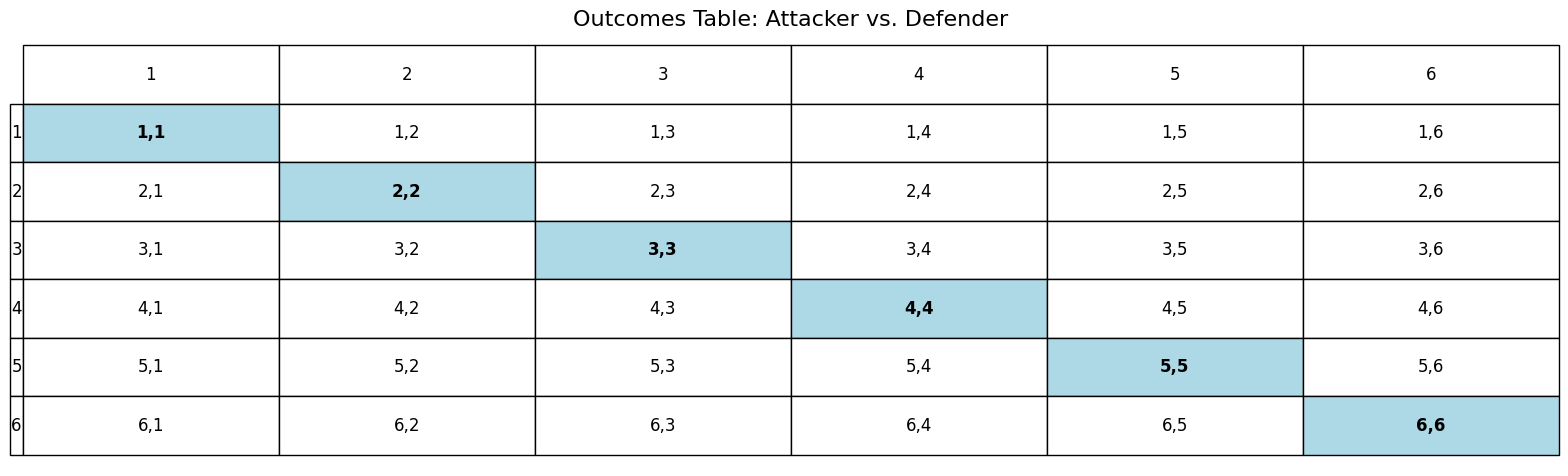

In [3]:
# Create the possible outcomes for the attacker and defender
attacker_die = np.arange(1, 7)
defender_die = np.arange(1, 7)

# Create a 2D grid of outcomes (attacker vs. defender)
outcomes = np.array([[f"{a},{d}" for d in defender_die] for a in attacker_die])

# Plot the table
fig, ax = plt.subplots()
ax.set_axis_off()

# Create the table
table = ax.table(cellText=outcomes, colLabels=defender_die, rowLabels=attacker_die, cellLoc='center', loc='center')

# Adjust the table styling
table.scale(3, 3)  # Adjust scale for better visibility
table.auto_set_font_size(False)
table.set_fontsize(12)

# Highlight diagonal cells (where attacker == defender)
for i in range(6):
    cell = table[(i+1, i)]
    cell.set_facecolor("#ADD8E6")  # Light blue color
    cell.set_text_props(weight='bold', color='black')
    
# Add the title
plt.title("Outcomes Table: Attacker vs. Defender", fontsize=16)

# Adjust the layout to center the plot within the notebook cell
plt.subplots_adjust(left=0.2, right=1, top=1, bottom=0.1)

# Display the plot
plt.show()

We have the attacker die on the vertical axis and the defender die on the horizontal axis.

We have highlighted the cases when the attacker and the defender both throw the same number. This is a useful cutoff for inspecting and highlighting the attacker winning outcomes through visualisation.

Let's now calculate the probability of winning an attack.

In [4]:
# Our sample space is
outcomes = np.array([(a, d) for a in attacker_die for d in defender_die])

# The attacker wins if he has strictly a bigger number than the defender
attacker_win = [(a, d) for a, d in outcomes if a > d]

# Count instances of attacker winning
print(f'The samples space has {len(outcomes)} elements and attacker wins in {len(attacker_win)} cases.')
print(f'So the probability of winning an attack in a 1 vs 1 scenario is {len(attacker_win)}/{len(outcomes)} = {str(round(len(attacker_win)/len(outcomes)*100, 2))}%.')
print(f'And the probability of defending an attack is {len(outcomes) - len(attacker_win)}/{len(outcomes)} = {str(round(((len(outcomes) - len(attacker_win))/len(outcomes))*100, 2))}%.')

The samples space has 36 elements and attacker wins in 15 cases.
So the probability of winning an attack in a 1 vs 1 scenario is 15/36 = 41.67%.
And the probability of defending an attack is 21/36 = 58.33%.


**Conclusion:** You should not attack $1$ soldier with $2$ soldiers.

---
---

## 2 vs 1 Scenario

Now you have started to deploy soldiers more strategically, and you find yourself in a situation where you have $3$ soldiers in one territory and a neigbouring territory only has $1$ opponent soldier. 

As you need to take a new territory in your round, to be eligible to take a card, you start thinking whether it is a good idea to start attacking.

In [5]:
# Create die range
die = np.arange(1, 7)

# Create sample space 
outcomes = np.array([(a1, a2, d) for a1 in die for a2 in die for d in die])

# Check length of sample space, should be 6^3 as we are throwing 3 dice
omega = len(outcomes)


# Create event of winning the attack and count this event
attacker_win = [(a1, a2, d) for a1 in die for a2 in die for d in die if max(a1, a2) > d]
attacker_w_2v1 = len(attacker_win)

# Count and calculate probabilities
print(f'Now our sample space has {omega} elements and the attacker wins in {attacker_w_2v1} cases.')
print(f'The probability of winning the attack is {attacker_w_2v1}/{omega} = {str(round(attacker_w_2v1/omega*100, 2))}%.')
print(f'The probability of defending a 2 vs 1 attack is {omega - attacker_w_2v1}/{omega} = {str(round((omega-attacker_w_2v1)*100/omega, 2))}%.')

Now our sample space has 216 elements and the attacker wins in 125 cases.
The probability of winning the attack is 125/216 = 57.87%.
The probability of defending a 2 vs 1 attack is 91/216 = 42.13%.


**Conclusion:** It can be a good idea to attack $1$ soldier with $3$ soldiers.

---
---

## 3 vs 1 Dice Scenario

You have deployed even more soldiers in a continental border and now you have $4$ + soldiers in that territory.
The opponent still has not consolidated that border and has left that territory with only $1$ soldier. You already know that you have about $57.87$% chance of winning with $2$ dice but now you are wondering how much better will the probabilities be when attacking with $3$ dice.

In [6]:
# Create sample space
outcomes = np.array([(a1, a2, a3, d) for a1 in die for a2 in die for a3 in die for d in die])

# Check lenght of sample space, should be 6^4
print(len(outcomes) == 6**4)
omega = len(outcomes)

True


In [7]:
# Again create event of winning the attack and count this event
attacker_win = [(a1, a2, a3, d) for a1 in die for a2 in die for a3 in die for d in die if max(a1, a2, a3) > d]
attacker_w_3v1 = len(attacker_win)

# Count and calculate probabilites
print(f'Now our sample space has {omega} elements and the attacker wins in {attacker_w_3v1} cases.')
print(f'The probability of winning the attack is {attacker_w_3v1}/{omega} = {str(round(attacker_w_3v1/omega*100, 2))}%.')
print(f'The probability of defending a 3 vs 1 attack is {omega - attacker_w_3v1}/{omega} = {str(round((omega-attacker_w_3v1)*100/omega, 2))}%.')

Now our sample space has 1296 elements and the attacker wins in 855 cases.
The probability of winning the attack is 855/1296 = 65.97%.
The probability of defending a 3 vs 1 attack is 441/1296 = 34.03%.


**Conlcusion:** As you expected, you have more chances to win in a $3$ vs $1$ dice attack. About $8.1$% more chances.


---

### Diving into Standard Discrete Distributions

Now we come into the fun part. For the $3$ vs $1$ Dice Scenario we can consider each throw to be a *Bernoulli Trial* or sometimes called a *Binary Experiment* with probability of *success* equal to $855/1296$.

Since you as an attacker have come to a point where you have $4$+ soldiers in one territory, you can throw 3 vs 1 dice for multiple rounds. So naturally you start thinking on *average* how many throws will it take you to take that territor, or simply put, how many independent *Bernoulli trials* are required before a *success* is observed.

This is what we call a *Geometric Distribution*.

In [8]:
import scipy.stats as stats
from scipy.stats import bernoulli, geom

# Parameters
p = 855/1296  # Probability of success

# Probability Mass Function (PMF) for Bernoulli trial
pmf_1 = bernoulli.pmf(1, p)  # P(X=1)
pmf_0 = bernoulli.pmf(0, p)  # P(X=0)

print(f"PMF for Success (X=1): {pmf_1:.4f}")
print(f"PMF for Failure (X=0): {pmf_0:.4f}")

PMF for Success (X=1): 0.6597
PMF for Failure (X=0): 0.3403


In [9]:
# Create a geometric distribution object
geom_dist = stats.geom(p)

# Probability Mass Function (PMF)
pmf_1 = geom_dist.pmf(1)
pmf_2 = geom_dist.pmf(2)
pmf_3 = geom_dist.pmf(3)  # P(X=3), i.e., first success on the 3rd trial
pmf_4 = geom_dist.pmf(4)
pmf_5 = geom_dist.pmf(5)

print(f"P(X=1) or probability of winning on 1st attempt (losing 0 soldiers): {str(round(pmf_1*100,2))}%.")
print(f"P(X=2) or probability of winning on 2nd attempt (losing 1 soldier): {str(round(pmf_2*100,2))}%.")
print(f"P(X=3) or probability of winning on 3rd attempt (losing 2 soldiers): {str(round(pmf_3*100,2))}%.")
print(f"P(X=4) or probability of winning on 4th attempt (losing 3 soldier): {str(round(pmf_4*100,2))}%.")
print(f"P(X=5) or probability of winning on 5th attempt (losing 4 soldiers): {str(round(pmf_5*100,2))}%.")

P(X=1) or probability of winning on 1st attempt (losing 0 soldiers): 65.97%.
P(X=2) or probability of winning on 2nd attempt (losing 1 soldier): 22.45%.
P(X=3) or probability of winning on 3rd attempt (losing 2 soldiers): 7.64%.
P(X=4) or probability of winning on 4th attempt (losing 3 soldier): 2.6%.
P(X=5) or probability of winning on 5th attempt (losing 4 soldiers): 0.88%.


As we can see we will need cummulative values.
This is where we use the cummulative distribution function (cdf).

In [10]:
# Calculate cummulative probabilities
cdf_1 = geom_dist.cdf(1) 
cdf_2 = geom_dist.cdf(2)
cdf_3 = geom_dist.cdf(3)
cdf_4 = geom_dist.cdf(4) # Probability of winning within 4 throws
cdf_5 = geom_dist.cdf(5)

print(f"P(X<=1) or probability of winning within 1st attempt (losing 0 soldiers): {str(round(cdf_1*100,2))}%.")
print(f"P(X<=2) or probability of winning within 2nd attempt (losing 1 soldier): {str(round(cdf_2*100,2))}%.")
print(f"P(X<=3) or probability of winning within 3rd attempt (losing 2 soldiers): {str(round(cdf_3*100,2))}%.")
print(f"P(X<=4) or probability of winning within 4th attempt (losing 3 soldiers): {str(round(cdf_4*100,2))}%.")
print(f"P(X<=5) or probability of winning within 5th attempt (losing 4 soldiers): {str(round(cdf_5*100,2))}%.")

P(X<=1) or probability of winning within 1st attempt (losing 0 soldiers): 65.97%.
P(X<=2) or probability of winning within 2nd attempt (losing 1 soldier): 88.42%.
P(X<=3) or probability of winning within 3rd attempt (losing 2 soldiers): 96.06%.
P(X<=4) or probability of winning within 4th attempt (losing 3 soldiers): 98.66%.
P(X<=5) or probability of winning within 5th attempt (losing 4 soldiers): 99.54%.


In [11]:
print(f'P(X>2) or probability of losing more than 2 soldiers is {str(round((1 - cdf_3)*100,2))}%.')

P(X>2) or probability of losing more than 2 soldiers is 3.94%.


In [12]:
# Calculate the expectation (mean) and variance
mean = geom_dist.mean()
variance = geom_dist.var()

print(f"Expectation (Mean) of the Geometric distribution: {mean:.2f}")
print(f"Variance of the Geometric distribution: {variance:.2f}")

Expectation (Mean) of the Geometric distribution: 1.52
Variance of the Geometric distribution: 0.78


**Conclusion:** if you attack with $3$ die against $1$ then your chance of losing $3+$ soldiers is about $3.94$%, so if you attack with $6+$ soldiers puts you in a very strong position to take the territory and get a card.

Also using *expectation* and *variance* formulas from mathematics, we can see that on average we need $1.52$ throws to win the territory, with a variance of around $0.78$, meaning that in about $3$ throws you have very high chances to win the battle.



This gets translated to a cost of about 2 soldiers to be confident in the attack.

---
---

## 3 vs 2 Dice Scenario

Now you find yourself in the mid-end phase of the game where everybody has soldiers along their borders and you have to crack them open (or defend). Now each attack can be executed with 3 vs 2 die and you wonder what the probabilites are. 

In addition now, we have 3 total outcomes, either you win the fight and remove 2 soldiers from the enemy, you draw and both lose 1 soldiers or you lose the throw and lose 2 soldiers. For the next part we have to think multinomial distributions.

In [13]:
# Create sample space 
outcomes = np.array([(a1, a2, a3, d1, d2) for a1 in die for a2 in die for a3 in die for d1 in die for d2 in die])

# Check length of sample space, should be 6^5 as we are throwing 5 dice
omega = len(outcomes)
print(len(outcomes) == 6**5)
print(omega)

True
7776


In [14]:
attc_win = [(a1, a2, a3, d1, d2) for a1 in die for a2 in die for a3 in die for d1 in die for d2 in die if max(a1, a2, a3) > max(d1, d2) and sorted((a1, a2, a3))[1] > min(d1, d2)]
attc_win_3v2 = len(attc_win)

attc_lose = [(a1, a2, a3, d1, d2) for a1 in die for a2 in die for a3 in die for d1 in die for d2 in die if max(a1, a2, a3) <= max(d1, d2) and sorted((a1, a2, a3))[1] <= min(d1, d2)]
attc_lose_3v2 = len(attc_lose)

attc_draw_3v2 = omega - attc_win_3v2 - attc_lose_3v2

# Count and calculate probabilities
print(f'Now our sample space has {omega} elements and the attacker wins in {attc_win_3v2} cases.')
print(f'The probability of winning the attack is {attc_win_3v2}/{omega} = {str(round(attc_win_3v2/omega*100, 2))}%.')
print(f'The probability of defending a 3 vs 2 attack is {attc_lose_3v2}/{omega} = {str(round((attc_lose_3v2)*100/omega, 2))}%.')
print(f'The probability of drawing the attack is {attc_draw_3v2}/{omega} = {str(round(attc_draw_3v2/omega*100, 2))}%.')

Now our sample space has 7776 elements and the attacker wins in 2890 cases.
The probability of winning the attack is 2890/7776 = 37.17%.
The probability of defending a 3 vs 2 attack is 2275/7776 = 29.26%.
The probability of drawing the attack is 2611/7776 = 33.58%.


---

### Diving into Standard Discrete Distributions

In a multinomial experiment, each trial has multiple outcomes (in your case, three outcomes: success, draw, and failure). The multinomial distribution describes the probabilities of obtaining various combinations of outcomes across 
𝑛 independent trials

In [15]:
from scipy.stats import multinomial

# Define the number of trials and the probabilities for each outcome
n = 10  # Number of independent trials
p1 = attc_win_3v2/omega  # Probability of success
p2 = attc_draw_3v2/omega  # Probability of draw
p3 = attc_lose_3v2/omega  # Probability of failure

# Probabilities must sum to 1
p = [p1, p2, p3]

# Create a multinomial distribution object
multinomial_dist = multinomial(n, p)

# Probability of a specific outcome (e.g., 4 successes, 3 draws, and 3 failures)
x = [4, 3, 3]  # Outcome: 4 successes, 3 draws, 3 failures
prob = multinomial_dist.pmf(x)


print(f"Probability of observing the outcome {x}: {prob:.4f}")

# Expected number of successes, draws, and failures
mean = multinomial_dist.mean()
print(f"Expected values (mean): {mean}")

# Variance of the number of successes, draws, and failures
# var = multinomial_dist.cov()
# print(f"Variances: {var}")

# Generate random samples from the multinomial distribution
# samples = multinomial_dist.rvs(size=5)  # Generate 5 random samples
# print(f"Random samples from the multinomial distribution:\n{samples}")


Probability of observing the outcome [4, 3, 3]: 0.0760
Expected values (mean): [3.71656379 3.35776749 2.92566872]


In [16]:
expected_value = -p2 -2 *p3
print(f'Expected loss of soldiers per throw is: {expected_value:.2f} soldiers.')

Expected loss of soldiers per throw is: -0.92 soldiers.
